In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("kc_house_data.csv")

In [52]:
# Check for missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [53]:
# Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


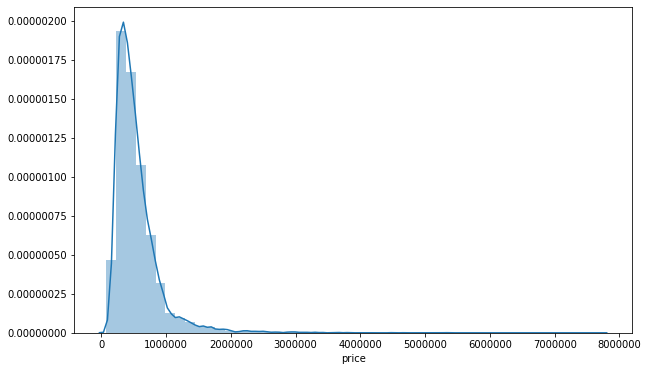

In [54]:
# Distribution plot of price
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

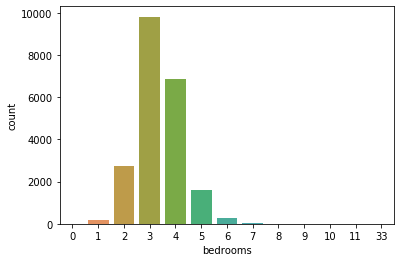

In [55]:
# Most houses fall between 0 an 1.5MM

# Count rooms
sns.countplot(df['bedrooms'])

In [56]:
# Most houses have 3 rooms, followed by 4
# There are a few outliers with 6-7 rooms

# See correlation between price and other features
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

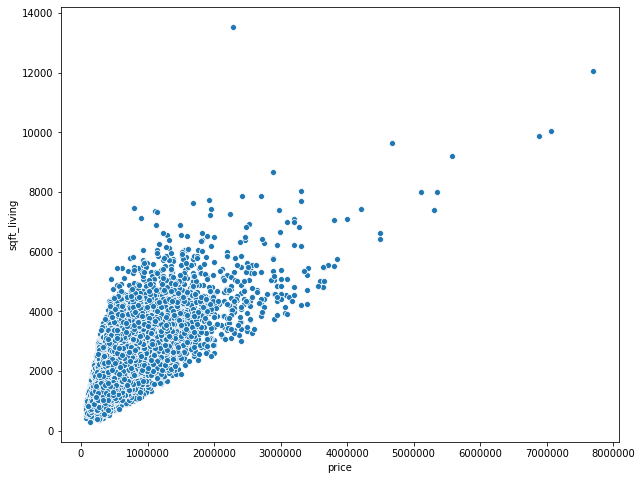

In [57]:
# Sq footage of living space seems to be highly corrolated
# to price. Let's make a scatter plot to get more info
plt.figure(figsize=(10,8))
sns.scatterplot(x='price', y='sqft_living', data=df)

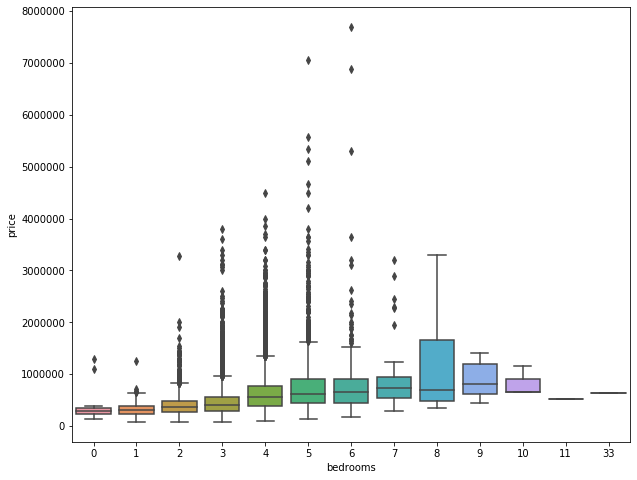

In [58]:
# They have a strong linear relationship
# Let's do a boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x='bedrooms', y='price', data=df)

In [59]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

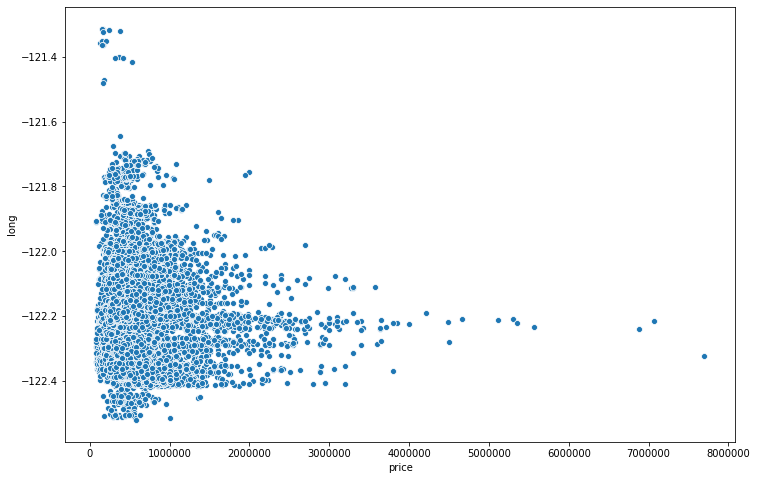

In [60]:
# See if there's any relation in price to longitude
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)

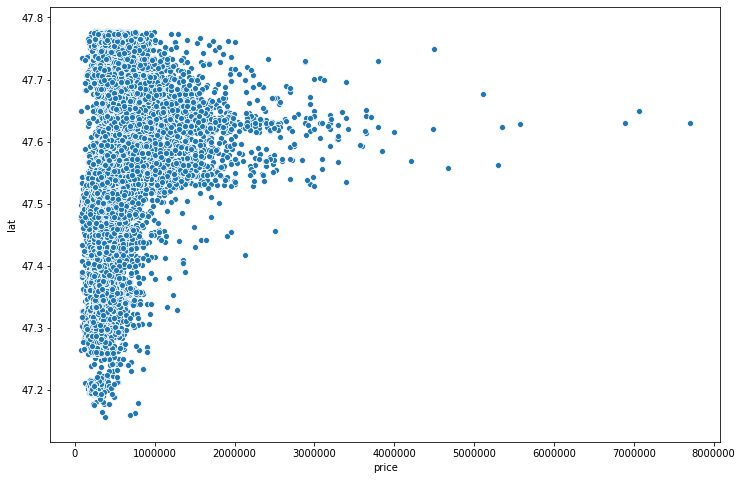

In [61]:
# At -122.2 longitude, there seems to be way higher 
# priced housing

# Let's do the same for latitude

plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)

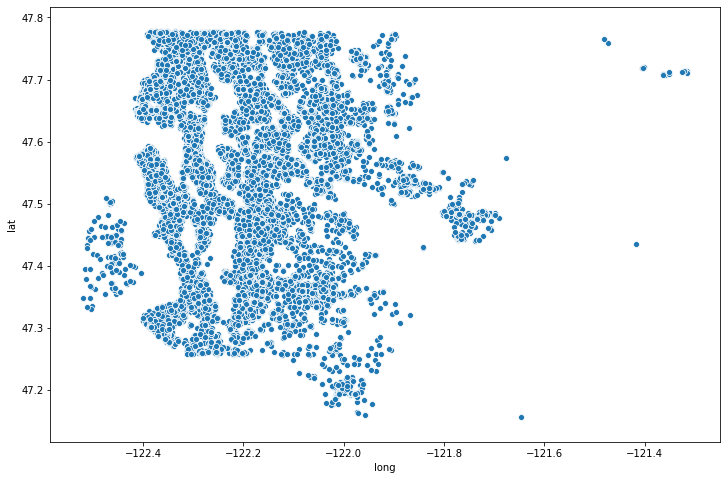

In [62]:
# Same thing again, there seems to be an area of
# high priced housing
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df)

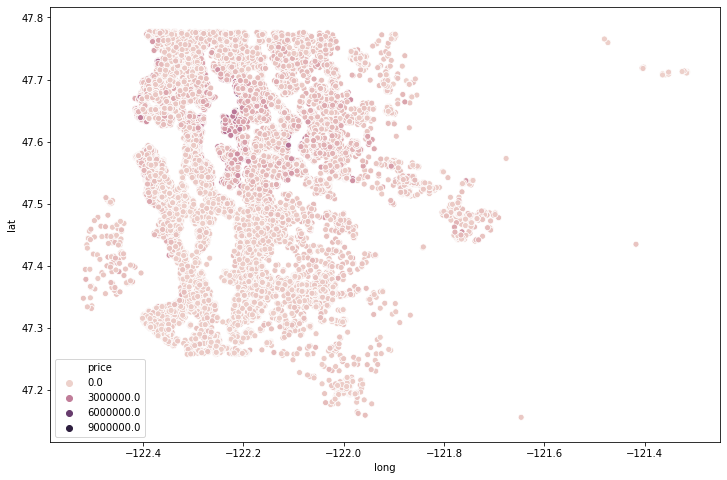

In [63]:
# What we've essentially created is a map of kings county..
# using freaking data points

# Let's hone in on this area by setting price as a hue
# on this graph

plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [64]:
# Map is not clear enough

# Sort values by price in descending order, output first 20
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [65]:
# Let's sample out top 1% of houses

len(df)* 0.01

# 1% is about 216 houses

216.13

In [66]:
# Make a new df sorted by price, grab everything after
# the 216th index

non_top_1_percent = df.sort_values('price', ascending=False).iloc[216:]

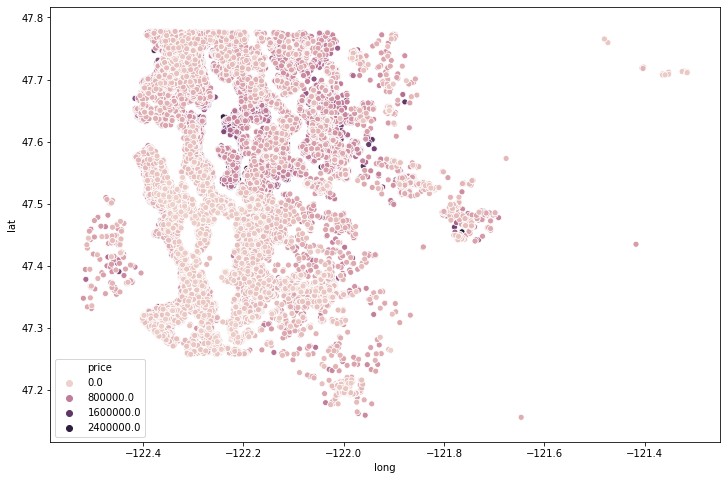

In [67]:
# Let's try the scatter plot again
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_percent, hue='price')

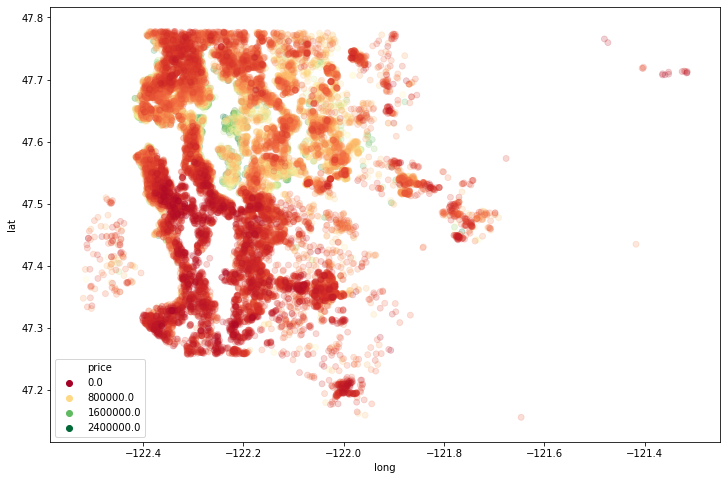

In [68]:
# Much clearer, but the edge coloring is bad
# lets fine tune this graph
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='long', 
    y='lat', 
    data=non_top_1_percent, 
    edgecolor=None, alpha=0.2, 
    hue='price', 
    palette='RdYlGn'
)

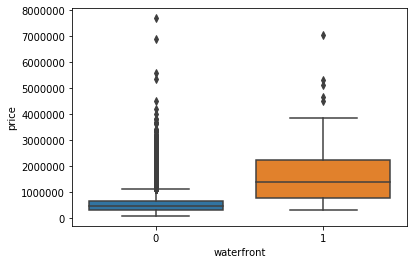

In [69]:
# By this graph we can summize that properties close to the
# water are more expensive, which makes sense

sns.boxplot(x='waterfront', y='price', data=df)

In [70]:
# Let's start engineering our features

# Start by dropping the cols we don't need
df = df.drop('id', axis=1)

In [71]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [72]:
# Convert dates to DateTime objects
df['date'] = pd.to_datetime(df['date'])

In [73]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [80]:
# Extract date into date col
df['year'] = df['date'].apply(lambda date: date.year)

In [81]:
df['month'] = df['date'].apply(lambda date: date.month)

In [82]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


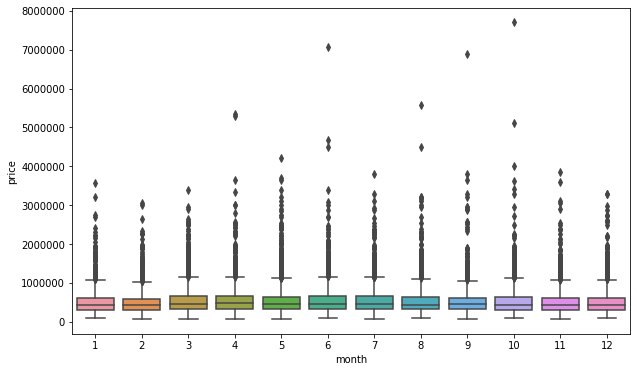

In [85]:
# We've now got date/year cols
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

In [89]:
# Year and month don't seem to be good features, there
# are no significant distros

# Get average price per month
df.groupby('month').mean()['price']

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

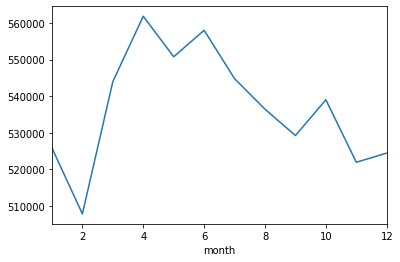

In [90]:
df.groupby('month').mean()['price'].plot()

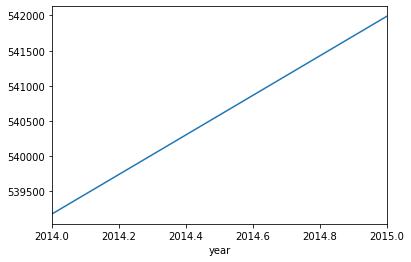

In [91]:
df.groupby('year').mean()['price'].plot()

In [92]:
# Price inflates per month, it is expected

# Drop date col
df = df.drop('date', axis=1)

In [95]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [96]:
# Zipcode can be confusing as a feature, it seems like
# a continous value, but its not. Let's see if its viable
# still
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [97]:
# This will create way too many categories of zipcodes
# not worth it
df = df.drop('zipcode', axis=1)

In [98]:
# Let's see if the renovation year can be a good feature
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [99]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [100]:
# Seperate features from target
features = df.drop('price', axis=1).values
target = df['price'].values

In [101]:
# Do T/T split
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=101)

In [104]:
# Do scaling
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()

In [106]:
# Scale features & test set
# Again, you should not fit scaler to test set
# You'll get data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
# Create model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [108]:
model = Sequential()

In [109]:
# Let's see the shape of our data so we know
# how many neurons to make each layer

X_train.shape

(15129, 19)

In [110]:
# 19 features, so 19 neurons each layer
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

# Output later, since we are only trying to predict
# one continous variable, price, layer is 1 neuron
model.add(Dense(1))

# Compile model with MSE cost func and adam optimizer
model.compile(optimizer='adam', loss='mse')

In [111]:
# Train (fit) model
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=400
)

Train on 15129 samples, validate on 6484 samples
Epoch 1/400
15129/15129 [==============================] - 2s 150us/sample - loss: 423629392258.4789 - val_loss: 433023383437.0290
Epoch 2/400
15129/15129 [==============================] - 1s 41us/sample - loss: 422591604959.4944 - val_loss: 429244083306.7587
Epoch 3/400
15129/15129 [==============================] - 1s 43us/sample - loss: 407348654601.1713 - val_loss: 393193832518.7514
Epoch 4/400
15129/15129 [==============================] - 1s 50us/sample - loss: 329631967783.6293 - val_loss: 264388379533.6607
Epoch 5/400
15129/15129 [==============================] - 1s 52us/sample - loss: 177572960740.7570 - val_loss: 122876214911.9210
Epoch 6/400
15129/15129 [==============================] - 1s 46us/sample - loss: 102858677143.5627 - val_loss: 103740009720.2616
Epoch 7/400
15129/15129 [==============================] - 1s 46us/sample - loss: 97760748607.5558 - val_loss: 102092588594.8526
Epoch 8/400
15129/15129 [================

15129/15129 [==============================] - 1s 54us/sample - loss: 40719247847.1936 - val_loss: 40699979542.2677
Epoch 65/400
15129/15129 [==============================] - 1s 58us/sample - loss: 40542747292.7236 - val_loss: 40358149052.4072
Epoch 66/400
15129/15129 [==============================] - 1s 40us/sample - loss: 40292874891.3964 - val_loss: 40140591342.7859
Epoch 67/400
15129/15129 [==============================] - 1s 53us/sample - loss: 40104640593.3569 - val_loss: 39895546990.5490
Epoch 68/400
15129/15129 [==============================] - 1s 51us/sample - loss: 39884632221.7728 - val_loss: 39711256365.0093
Epoch 69/400
15129/15129 [==============================] - 1s 56us/sample - loss: 39700086084.5476 - val_loss: 39524014304.8883
Epoch 70/400
15129/15129 [==============================] - 1s 56us/sample - loss: 39515318791.1407 - val_loss: 39305521331.4053
Epoch 71/400
15129/15129 [==============================] - 1s 57us/sample - loss: 39340990844.6581 - val_loss

15129/15129 [==============================] - 1s 39us/sample - loss: 34280283207.0011 - val_loss: 33811069314.6058
Epoch 128/400
15129/15129 [==============================] - 1s 43us/sample - loss: 34221755513.4938 - val_loss: 33664620540.2097
Epoch 129/400
15129/15129 [==============================] - 1s 36us/sample - loss: 34187109069.1858 - val_loss: 33667114573.3843
Epoch 130/400
15129/15129 [==============================] - 1s 38us/sample - loss: 34207455924.2102 - val_loss: 33588459949.5620
Epoch 131/400
15129/15129 [==============================] - 1s 36us/sample - loss: 34120229524.5338 - val_loss: 33530525760.4343
Epoch 132/400
15129/15129 [==============================] - 1s 38us/sample - loss: 34059849252.5835 - val_loss: 33486480680.2714
Epoch 133/400
15129/15129 [==============================] - 1s 37us/sample - loss: 33993733346.3372 - val_loss: 33421401246.5589
Epoch 134/400
15129/15129 [==============================] - 1s 36us/sample - loss: 33957120189.9229 - v

15129/15129 [==============================] - 1s 37us/sample - loss: 32257880371.6941 - val_loss: 31616528088.3603
Epoch 191/400
15129/15129 [==============================] - 1s 37us/sample - loss: 32239714470.4364 - val_loss: 31613945475.7113
Epoch 192/400
15129/15129 [==============================] - 1s 44us/sample - loss: 32212775785.2664 - val_loss: 31579964460.8513
Epoch 193/400
15129/15129 [==============================] - 1s 70us/sample - loss: 32189671380.8172 - val_loss: 31578619655.1067
Epoch 194/400
15129/15129 [==============================] - 1s 35us/sample - loss: 32136857087.6954 - val_loss: 31531802933.5373
Epoch 195/400
15129/15129 [==============================] - 1s 53us/sample - loss: 32122102152.9090 - val_loss: 31539801275.6175
Epoch 196/400
15129/15129 [==============================] - 2s 104us/sample - loss: 32075306388.6861 - val_loss: 31504394788.3233
Epoch 197/400
15129/15129 [==============================] - 1s 71us/sample - loss: 32047786004.8469 - 

15129/15129 [==============================] - 1s 40us/sample - loss: 30935411819.4154 - val_loss: 30589745998.4898
Epoch 254/400
15129/15129 [==============================] - 1s 40us/sample - loss: 30959003566.6431 - val_loss: 30503586202.6107
Epoch 255/400
15129/15129 [==============================] - 1s 38us/sample - loss: 30956188467.1526 - val_loss: 30399626617.1302
Epoch 256/400
15129/15129 [==============================] - 1s 37us/sample - loss: 30887982663.3734 - val_loss: 30388693717.2017
Epoch 257/400
15129/15129 [==============================] - 1s 37us/sample - loss: 30879769001.1945 - val_loss: 30371034952.8044
Epoch 258/400
15129/15129 [==============================] - 1s 52us/sample - loss: 30894732892.6264 - val_loss: 30379039005.5324
Epoch 259/400
15129/15129 [==============================] - 1s 51us/sample - loss: 30842966920.2660 - val_loss: 30349719808.4738
Epoch 260/400
15129/15129 [==============================] - 1s 40us/sample - loss: 30838727389.1594 - v

15129/15129 [==============================] - 1s 38us/sample - loss: 30038192793.4748 - val_loss: 29586575308.1999
Epoch 317/400
15129/15129 [==============================] - 1s 37us/sample - loss: 30055502969.8999 - val_loss: 29595604193.5201
Epoch 318/400
15129/15129 [==============================] - 1s 38us/sample - loss: 30008624218.3589 - val_loss: 29577651146.3047
Epoch 319/400
15129/15129 [==============================] - 1s 37us/sample - loss: 30077150281.7085 - val_loss: 29556646030.7662
Epoch 320/400
15129/15129 [==============================] - 1s 40us/sample - loss: 29982579580.0828 - val_loss: 29606285290.5219
Epoch 321/400
15129/15129 [==============================] - 1s 40us/sample - loss: 29972760618.1675 - val_loss: 29589857502.9932
Epoch 322/400
15129/15129 [==============================] - 1s 40us/sample - loss: 29995865685.9933 - val_loss: 29524349358.8254
Epoch 323/400
15129/15129 [==============================] - 1s 42us/sample - loss: 29961048722.5033 - v

15129/15129 [==============================] - 1s 38us/sample - loss: 29232421315.6592 - val_loss: 28882754464.6120
Epoch 380/400
15129/15129 [==============================] - 1s 37us/sample - loss: 29208109210.1855 - val_loss: 28873436206.1147
Epoch 381/400
15129/15129 [==============================] - 1s 45us/sample - loss: 29235929378.2315 - val_loss: 28862422011.5780
Epoch 382/400
15129/15129 [==============================] - 1s 62us/sample - loss: 29180978572.4286 - val_loss: 28862321900.8908
Epoch 383/400
15129/15129 [==============================] - 1s 40us/sample - loss: 29170204217.8365 - val_loss: 28846145034.4232
Epoch 384/400
15129/15129 [==============================] - 1s 38us/sample - loss: 29152048470.2809 - val_loss: 28887908785.3522
Epoch 385/400
15129/15129 [==============================] - 1s 40us/sample - loss: 29149987021.6258 - val_loss: 28859333264.9772
Epoch 386/400
15129/15129 [==============================] - 1s 39us/sample - loss: 29069913972.7051 - v

In [116]:
# Eval model

# Get losses
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,4.236294e+11,4.330234e+11
1,4.225916e+11,4.292441e+11
2,4.073487e+11,3.931938e+11
3,3.296320e+11,2.643884e+11
4,1.775730e+11,1.228762e+11
...,...,...
395,2.898909e+10,2.872384e+10
396,2.894332e+10,2.868331e+10
397,2.894751e+10,2.867085e+10
398,2.898458e+10,2.865456e+10


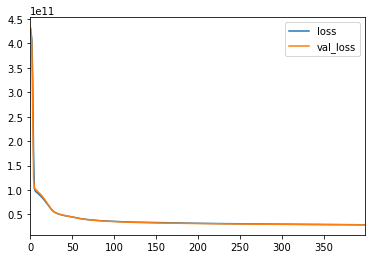

In [117]:
# Plot losses
losses.plot()

In [118]:
# We could keep training since validation loss is not
# rising

# Let's grab some metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [119]:
predictions = model.predict(X_test)

In [122]:
# Get MSE by comparing our target test data
# to our predictions
mean_squared_error(y_test, predictions)

169497.19612451972

In [123]:
# That number is huge, get square root error
np.sqrt(mean_squared_error(y_test, predictions))

169497.19612451972

In [124]:
mean_absolute_error(y_test, predictions)

106044.7218706624

In [125]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [126]:
5.400881e+05

540088.1

In [129]:
# We're off by 20% of the average price, that's pretty bad

explained_variance_score(y_test, predictions)

0.79560396658028

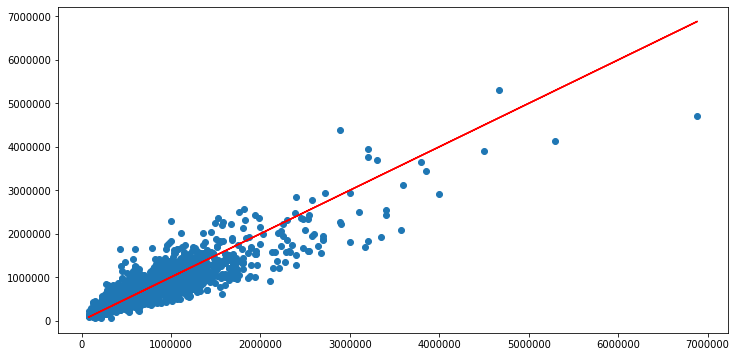

In [133]:
# The closer the variance score is to 1, the better
# Our score isn't super bad, but it's not great either

# Maybe it would be worth it to keep training the model
# for a bit
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [136]:
# The outliers are the reason our model is a little wonky

# Let's test with unknown data, grab first house of df
# then drop price so we can predict it
single_house = df.drop('price', axis=1).iloc[0]

In [138]:
# Data isnt in the right shape, we need extra brackets
# -1 means keep thos old dimensions along that axis
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [142]:
# Scale values
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [144]:
model.predict(single_house)

array([[292665.88]], dtype=float32)

In [146]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [154]:
# We are over shooting our prices, but we are close

len(df) * 0.09

1945.1699999999998

In [155]:
non_top_10_percent = df.sort_values('price', ascending=False).iloc[1946:]

In [156]:
non_top_10_percent

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
20290,919990.0,5,3.25,3960,6352,2.0,0,0,3,10,3960,0,2014,0,47.5806,-122.055,2930,9875,2015,3
18829,919950.0,5,2.75,3170,7062,2.0,0,0,3,9,3170,0,2014,0,47.5937,-122.061,3210,6891,2014,9
20125,919204.0,4,3.50,3760,5000,2.0,0,0,3,9,2860,900,2014,0,47.6826,-122.394,1340,5000,2014,5
17353,919000.0,4,2.50,3620,17133,1.0,0,4,3,10,2220,1400,1993,0,47.5604,-122.027,3530,17026,2015,1
20028,918000.0,5,3.50,3920,5150,2.0,0,0,3,9,2820,1100,2004,0,47.6638,-122.084,3170,5530,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,47.4987,-122.341,1140,11250,2014,11
16198,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,47.4808,-122.315,860,9000,2015,3
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,2014,5
15293,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,47.4739,-122.280,1700,10387,2014,5


In [157]:
new_features = non_top_10_percent.drop('price', axis=1).values
new_target = non_top_10_percent['price'].values

In [158]:
# Make new T/T split
X1_train, X1_test, y1_train, y1_test = train_test_split(new_features, new_target, test_size=0.30, random_state=101)

In [159]:
# Scale values
scaler1 = MinMaxScaler()

X1_train = scaler1.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [160]:
# Create second model
model1 = Sequential()

model1.add(Dense(19, activation='relu'))
model1.add(Dense(19, activation='relu'))
model1.add(Dense(19, activation='relu'))
model1.add(Dense(19, activation='relu'))
model1.add(Dense(19, activation='relu'))

# Output layer
model1.add(Dense(1))

# Compile with MSE + Adam opt
model1.compile(optimizer='adam', loss='mse')

In [161]:
model1.fit(
    x=X1_train,
    y=y1_train,
    validation_data=(X1_test, y1_test),
    batch_size=128,
    epochs=500,
)

Train on 13766 samples, validate on 5901 samples
Epoch 1/500
13766/13766 [==============================] - 2s 143us/sample - loss: 240806246224.7462 - val_loss: 241664494743.4916
Epoch 2/500
13766/13766 [==============================] - 1s 41us/sample - loss: 239146471688.8148 - val_loss: 234954268384.6345
Epoch 3/500
13766/13766 [==============================] - 1s 40us/sample - loss: 199429032737.2878 - val_loss: 138078648790.9602
Epoch 4/500
13766/13766 [==============================] - 1s 41us/sample - loss: 56465550264.7380 - val_loss: 24171929441.7407
Epoch 5/500
13766/13766 [==============================] - 1s 42us/sample - loss: 22417573263.4537 - val_loss: 23611680524.7111
Epoch 6/500
13766/13766 [==============================] - 1s 41us/sample - loss: 22073098776.7706 - val_loss: 23427999864.0827
Epoch 7/500
13766/13766 [==============================] - 1s 46us/sample - loss: 21714673171.8611 - val_loss: 22960812935.7438
Epoch 8/500
13766/13766 [=======================

13766/13766 [==============================] - 1s 46us/sample - loss: 11406762205.3732 - val_loss: 30105994827.7458
Epoch 65/500
13766/13766 [==============================] - 1s 44us/sample - loss: 11385671273.2564 - val_loss: 29229156432.5179
Epoch 66/500
13766/13766 [==============================] - 1s 46us/sample - loss: 11377174675.2846 - val_loss: 30151387411.2184
Epoch 67/500
13766/13766 [==============================] - 1s 44us/sample - loss: 11347129442.6361 - val_loss: 30748178526.7473
Epoch 68/500
13766/13766 [==============================] - 1s 62us/sample - loss: 11332959369.6144 - val_loss: 30911739762.0525
Epoch 69/500
13766/13766 [==============================] - 1s 49us/sample - loss: 11324289647.0585 - val_loss: 31777857774.7772
Epoch 70/500
13766/13766 [==============================] - 1s 42us/sample - loss: 11290367257.9236 - val_loss: 30684633444.4304
Epoch 71/500
13766/13766 [==============================] - 1s 41us/sample - loss: 11288027900.5410 - val_loss

13766/13766 [==============================] - 0s 35us/sample - loss: 10503657635.4264 - val_loss: 39244196929.7678
Epoch 128/500
13766/13766 [==============================] - 0s 35us/sample - loss: 10485574900.7305 - val_loss: 40268207459.2157
Epoch 129/500
13766/13766 [==============================] - 0s 34us/sample - loss: 10485613198.3007 - val_loss: 38392830062.0180
Epoch 130/500
13766/13766 [==============================] - 0s 35us/sample - loss: 10480308179.9634 - val_loss: 40240842293.5340
Epoch 131/500
13766/13766 [==============================] - 0s 35us/sample - loss: 10461380340.3586 - val_loss: 37497437382.6917
Epoch 132/500
13766/13766 [==============================] - 0s 35us/sample - loss: 10463261836.8874 - val_loss: 38186719601.2717
Epoch 133/500
13766/13766 [==============================] - 0s 34us/sample - loss: 10448911957.7673 - val_loss: 37950105804.7653
Epoch 134/500
13766/13766 [==============================] - 0s 35us/sample - loss: 10446368926.2194 - v

13766/13766 [==============================] - 1s 68us/sample - loss: 10093070699.5252 - val_loss: 37476967786.8510
Epoch 191/500
13766/13766 [==============================] - 1s 58us/sample - loss: 10092649863.8663 - val_loss: 37085984681.9292
Epoch 192/500
13766/13766 [==============================] - 1s 51us/sample - loss: 10088566569.6191 - val_loss: 38148036469.8702
Epoch 193/500
13766/13766 [==============================] - 1s 42us/sample - loss: 10091384586.8232 - val_loss: 34465099610.7995
Epoch 194/500
13766/13766 [==============================] - 0s 35us/sample - loss: 10093928239.7187 - val_loss: 37269745491.8583
Epoch 195/500
13766/13766 [==============================] - 1s 37us/sample - loss: 10098307195.9274 - val_loss: 37069492453.0595
Epoch 196/500
13766/13766 [==============================] - 0s 35us/sample - loss: 10087701015.1341 - val_loss: 34543483769.1673
Epoch 197/500
13766/13766 [==============================] - 0s 33us/sample - loss: 10099653388.3109 - v

13766/13766 [==============================] - 0s 32us/sample - loss: 9934317078.6878 - val_loss: 31330595368.8663
Epoch 254/500
13766/13766 [==============================] - 0s 33us/sample - loss: 9935955478.8366 - val_loss: 32595625897.2350
Epoch 255/500
13766/13766 [==============================] - 0s 32us/sample - loss: 9960323827.3172 - val_loss: 33669917360.5667
Epoch 256/500
13766/13766 [==============================] - 0s 34us/sample - loss: 9932005258.7674 - val_loss: 30984426908.1335
Epoch 257/500
13766/13766 [==============================] - 0s 32us/sample - loss: 9929477896.7404 - val_loss: 32004025148.0847
Epoch 258/500
13766/13766 [==============================] - 0s 33us/sample - loss: 9925772690.8755 - val_loss: 32414117936.5884
Epoch 259/500
13766/13766 [==============================] - 0s 33us/sample - loss: 9926045530.7883 - val_loss: 32634571711.6204
Epoch 260/500
13766/13766 [==============================] - 0s 33us/sample - loss: 9919498206.5262 - val_loss:

13766/13766 [==============================] - 0s 32us/sample - loss: 9714795292.3783 - val_loss: 28488762489.9915
Epoch 317/500
13766/13766 [==============================] - 0s 32us/sample - loss: 9708039726.0450 - val_loss: 26062227948.1308
Epoch 318/500
13766/13766 [==============================] - 0s 33us/sample - loss: 9719175519.8466 - val_loss: 25925035060.9266
Epoch 319/500
13766/13766 [==============================] - 0s 32us/sample - loss: 9669862844.8293 - val_loss: 26969325729.7299
Epoch 320/500
13766/13766 [==============================] - 0s 33us/sample - loss: 9655686542.4123 - val_loss: 27559149941.0893
Epoch 321/500
13766/13766 [==============================] - 0s 32us/sample - loss: 9641414939.7088 - val_loss: 29105271909.8621
Epoch 322/500
13766/13766 [==============================] - 0s 33us/sample - loss: 9623336313.8817 - val_loss: 27557022470.6375
Epoch 323/500
13766/13766 [==============================] - 0s 33us/sample - loss: 9610071215.1050 - val_loss:

13766/13766 [==============================] - 0s 33us/sample - loss: 7898410640.1604 - val_loss: 20475730359.2042
Epoch 380/500
13766/13766 [==============================] - 0s 33us/sample - loss: 7862672763.4438 - val_loss: 21578380798.3515
Epoch 381/500
13766/13766 [==============================] - 0s 33us/sample - loss: 7825556781.8591 - val_loss: 20797529170.2532
Epoch 382/500
13766/13766 [==============================] - 0s 33us/sample - loss: 7793941730.5803 - val_loss: 20206373206.2010
Epoch 383/500
13766/13766 [==============================] - 0s 32us/sample - loss: 7767906532.9606 - val_loss: 20748910931.2510
Epoch 384/500
13766/13766 [==============================] - 0s 32us/sample - loss: 7735586776.2778 - val_loss: 21035538534.9032
Epoch 385/500
13766/13766 [==============================] - 0s 32us/sample - loss: 7720695955.2102 - val_loss: 20300049804.8629
Epoch 386/500
13766/13766 [==============================] - 0s 32us/sample - loss: 7683469811.7263 - val_loss:

13766/13766 [==============================] - 0s 32us/sample - loss: 6692418087.4991 - val_loss: 16704737345.2472
Epoch 443/500
13766/13766 [==============================] - 0s 33us/sample - loss: 6700667845.6812 - val_loss: 16888818353.9549
Epoch 444/500
13766/13766 [==============================] - 0s 32us/sample - loss: 6679303309.0362 - val_loss: 16375455412.5579
Epoch 445/500
13766/13766 [==============================] - 0s 33us/sample - loss: 6670544824.2917 - val_loss: 18329847793.0764
Epoch 446/500
13766/13766 [==============================] - 0s 33us/sample - loss: 6674277027.1289 - val_loss: 17503647075.9098
Epoch 447/500
13766/13766 [==============================] - 0s 33us/sample - loss: 6652829835.2509 - val_loss: 18790637815.9742
Epoch 448/500
13766/13766 [==============================] - 0s 33us/sample - loss: 6659810268.9641 - val_loss: 16514754586.8971
Epoch 449/500
13766/13766 [==============================] - 0s 33us/sample - loss: 6629845530.4071 - val_loss:

In [162]:
# Eval model

# Get losses
losses1 = pd.DataFrame(model.history.history)
losses1

,loss,val_loss
0,4.236294e+11,4.330234e+11
1,4.225916e+11,4.292441e+11
2,4.073487e+11,3.931938e+11
3,3.296320e+11,2.643884e+11
4,1.775730e+11,1.228762e+11
...,...,...
395,2.898909e+10,2.872384e+10
396,2.894332e+10,2.868331e+10
397,2.894751e+10,2.867085e+10
398,2.898458e+10,2.865456e+10


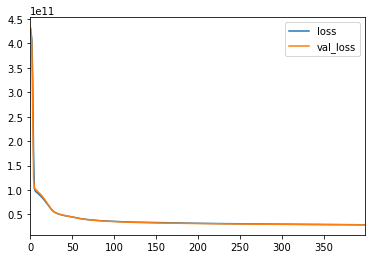

In [164]:
losses1.plot()

In [165]:
predictions1 = model1.predict(X1_test)

In [166]:
mean_squared_error(y1_test, predictions1)

17280086806.29495

In [167]:
np.sqrt(mean_squared_error(y1_test, predictions1))

131453.74397975492

In [168]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

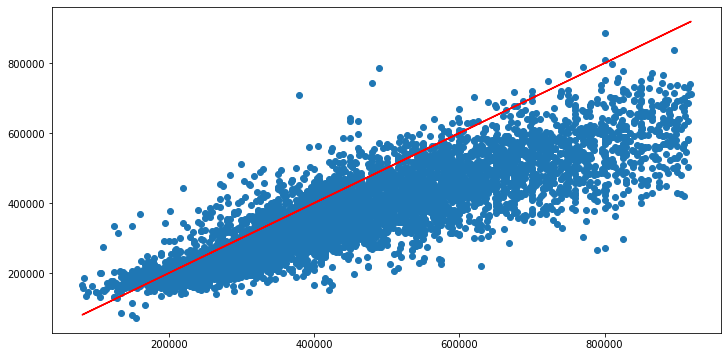

In [170]:
plt.figure(figsize=(12,6))
plt.scatter(y1_test, predictions1)
plt.plot(y1_test, y1_test, 'r')

In [172]:
single_house1 = non_top_10_percent.drop('price', axis=1).iloc[0]
single_house1 = scaler1.transform(single_house1.values.reshape(-1, 19))

In [173]:
model1.predict(single_house1)

array([[904311.25]], dtype=float32)

In [174]:
non_top_10_percent.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
20290,919990.0,5,3.25,3960,6352,2.0,0,0,3,10,3960,0,2014,0,47.5806,-122.055,2930,9875,2015,3
